In [3]:
import pandas as pd
import networkx as nx
import seaborn as sns
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [4]:
df=pd.read_csv("marvel-unimodal-edges.csv",sep=',',nrows=900)


In [96]:
G=nx.from_pandas_edgelist(df, "Source", "Target","Weight")

900

<ipython-input-53-12e40f4ebae8>:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 288 nodes and 900 edges


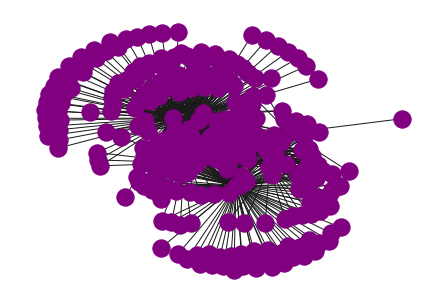

In [53]:
print(nx.info(G))
nx.draw(G,node_color="purple")

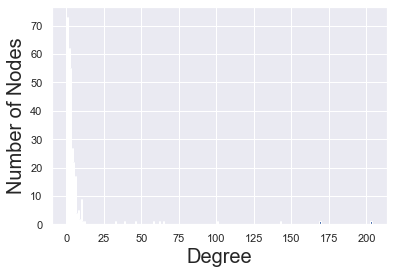

In [7]:
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)



#################################

def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
    print(values)
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    print(len(P_k))
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "bo")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()
    plt.show()  


In [8]:
df.head(900)


,Source,Target,Weight
0,Black Panther / T'chal,Loki [asgardian],10
1,Black Panther / T'chal,Mantis / ? Brandt,23
2,Black Panther / T'chal,Iceman / Robert Bobby,12
3,Black Panther / T'chal,Marvel Girl / Jean Grey,10
4,Black Panther / T'chal,Cyclops / Scott Summer,14
...,...,...,...
895,Nova / Richard Rider,White Queen / Emma Fro,6
896,Nova / Richard Rider,Cyclops / Scott Summer,23
897,Nova / Richard Rider,Invisible Woman / Sue,29
898,Nova / Richard Rider,Jack Of Hearts / Jack,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  900 non-null    object
 1   Target  900 non-null    object
 2   Weight  900 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.2+ KB


In [10]:

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'playing'
    return state


In [11]:
initial_state(G)

{"Black Panther / T'chal": 'playing',
 'Loki [asgardian]': 'playing',
 'Mantis / ? Brandt': 'playing',
 'Iceman / Robert Bobby': 'playing',
 'Marvel Girl / Jean Grey': 'playing',
 'Cyclops / Scott Summer': 'playing',
 'Klaw / Ulysses Klaw': 'playing',
 'Human Torch / Johnny S': 'playing',
 'Richards, Franklin B': 'playing',
 'Wolverine / Logan': 'playing',
 'Firebird / Bonita Juar': 'playing',
 'Mr. Fantastic / Reed R': 'playing',
 'Medusa / Medusalith Am': 'playing',
 'Dr. Strange / Stephen': 'playing',
 'Jack Of Hearts / Jack': 'playing',
 'Mephisto': 'playing',
 'Thanos': 'playing',
 'Swordsman / Jacques Du': 'playing',
 'Collector / Taneleer T': 'playing',
 'Lockjaw [inhuman]': 'playing',
 'Sub-mariner / Namor Ma': 'playing',
 'Pharaoh Rama-tut': 'playing',
 'Ant-man Ii / Scott Har': 'playing',
 'Lyja Lazerfist [skru': 'playing',
 'Gorgon [inhuman]': 'playing',
 'Nighthawk Ii / Kyle Ri': 'playing',
 'Cage, Luke / Carl Luca': 'playing',
 'Colossus Ii / Peter Ra': 'playing',
 'Hellca

In [12]:
import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'playing':
            if random.random() < P_AWAKEN:
                next_state[node] = 'running'
    return next_state

In [13]:
test_state = initial_state(G)
state_transition(G, test_state)

{'Loki [asgardian]': 'running',
 'Cyclops / Scott Summer': 'running',
 'Jack Of Hearts / Jack': 'running',
 'Lyja Lazerfist [skru': 'running',
 'Nighthawk Ii / Kyle Ri': 'running',
 'Sersi / Sylvia': 'running',
 'Uatu': 'running',
 'Nightcrawler / Kurt Wa': 'running',
 'Angel / Warren Kenneth': 'running',
 'Silver Surfer / Norrin': 'running',
 'Dr. Doom / Victor Von': 'running',
 'Wonder Man / Simon Wil': 'running',
 'Triton': 'running',
 'Ultron': 'running',
 'Jameson, J. Jonah': 'running',
 'Masters, Alicia Reis': 'running',
 'Falcon / Sam Wilson': 'running',
 'Justice Ii / Vance Ast': 'running',
 'Captain Marvel Ii / Mo': 'running',
 'Captain Britain / Bria': 'running',
 'Jocasta': 'running',
 'Nova / Richard Rider': 'running',
 'Attuma': 'running',
 'Pyro / Allerdyce Johnn': 'running',
 'Mister Hyde / Calvin Z': 'running',
 'Mole Man / Harvey Rupe': 'running',
 "O'brien, Michael": 'running',
 'Whizzer Ii / Stanley S': 'running',
 'Beetle / Abner Ronald': 'running',
 'Snowbird / Nar

In [14]:
from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Simple Sim')

In [15]:
sim.state()

{"Black Panther / T'chal": 'playing',
 'Loki [asgardian]': 'playing',
 'Mantis / ? Brandt': 'playing',
 'Iceman / Robert Bobby': 'playing',
 'Marvel Girl / Jean Grey': 'playing',
 'Cyclops / Scott Summer': 'playing',
 'Klaw / Ulysses Klaw': 'playing',
 'Human Torch / Johnny S': 'playing',
 'Richards, Franklin B': 'playing',
 'Wolverine / Logan': 'playing',
 'Firebird / Bonita Juar': 'playing',
 'Mr. Fantastic / Reed R': 'playing',
 'Medusa / Medusalith Am': 'playing',
 'Dr. Strange / Stephen': 'playing',
 'Jack Of Hearts / Jack': 'playing',
 'Mephisto': 'playing',
 'Thanos': 'playing',
 'Swordsman / Jacques Du': 'playing',
 'Collector / Taneleer T': 'playing',
 'Lockjaw [inhuman]': 'playing',
 'Sub-mariner / Namor Ma': 'playing',
 'Pharaoh Rama-tut': 'playing',
 'Ant-man Ii / Scott Har': 'playing',
 'Lyja Lazerfist [skru': 'playing',
 'Gorgon [inhuman]': 'playing',
 'Nighthawk Ii / Kyle Ri': 'playing',
 'Cage, Luke / Carl Luca': 'playing',
 'Colossus Ii / Peter Ra': 'playing',
 'Hellca

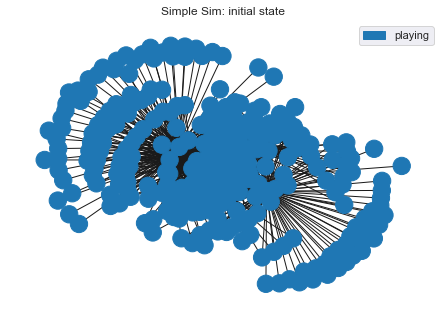

In [16]:
sim.draw()

In [17]:
sim.run()

In [18]:
sim.steps

1

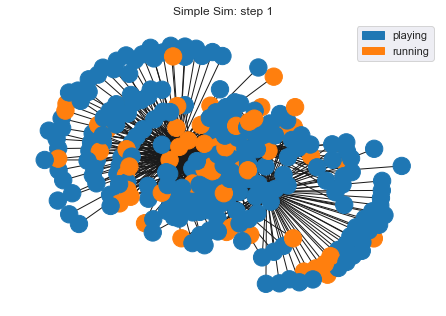

In [19]:
sim.draw()

In [20]:
sim.state()

{"Black Panther / T'chal": 'playing',
 'Loki [asgardian]': 'playing',
 'Mantis / ? Brandt': 'playing',
 'Iceman / Robert Bobby': 'playing',
 'Marvel Girl / Jean Grey': 'playing',
 'Cyclops / Scott Summer': 'playing',
 'Klaw / Ulysses Klaw': 'running',
 'Human Torch / Johnny S': 'playing',
 'Richards, Franklin B': 'playing',
 'Wolverine / Logan': 'playing',
 'Firebird / Bonita Juar': 'running',
 'Mr. Fantastic / Reed R': 'playing',
 'Medusa / Medusalith Am': 'playing',
 'Dr. Strange / Stephen': 'playing',
 'Jack Of Hearts / Jack': 'playing',
 'Mephisto': 'playing',
 'Thanos': 'playing',
 'Swordsman / Jacques Du': 'playing',
 'Collector / Taneleer T': 'playing',
 'Lockjaw [inhuman]': 'playing',
 'Sub-mariner / Namor Ma': 'running',
 'Pharaoh Rama-tut': 'playing',
 'Ant-man Ii / Scott Har': 'playing',
 'Lyja Lazerfist [skru': 'playing',
 'Gorgon [inhuman]': 'running',
 'Nighthawk Ii / Kyle Ri': 'playing',
 'Cage, Luke / Carl Luca': 'running',
 'Colossus Ii / Peter Ra': 'playing',
 'Hellca

In [21]:
sim.run(40)

In [22]:
sim.steps

41

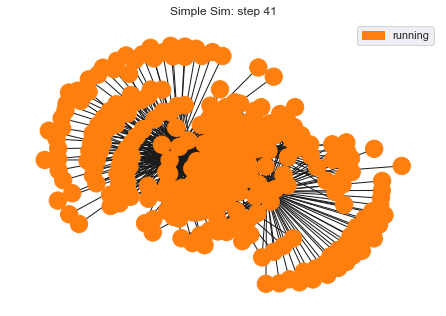

In [23]:
sim.draw()

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

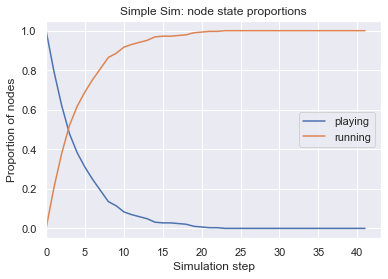

In [24]:
sim.plot()

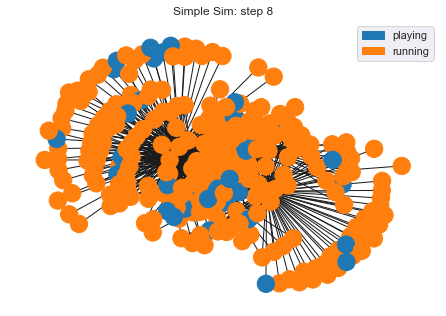

In [25]:
sim.draw(8)

In [26]:
sim.state(8)

{"Black Panther / T'chal": 'running',
 'Loki [asgardian]': 'running',
 'Mantis / ? Brandt': 'running',
 'Iceman / Robert Bobby': 'playing',
 'Marvel Girl / Jean Grey': 'running',
 'Cyclops / Scott Summer': 'running',
 'Klaw / Ulysses Klaw': 'running',
 'Human Torch / Johnny S': 'running',
 'Richards, Franklin B': 'running',
 'Wolverine / Logan': 'running',
 'Firebird / Bonita Juar': 'running',
 'Mr. Fantastic / Reed R': 'playing',
 'Medusa / Medusalith Am': 'running',
 'Dr. Strange / Stephen': 'running',
 'Jack Of Hearts / Jack': 'running',
 'Mephisto': 'running',
 'Thanos': 'running',
 'Swordsman / Jacques Du': 'running',
 'Collector / Taneleer T': 'running',
 'Lockjaw [inhuman]': 'running',
 'Sub-mariner / Namor Ma': 'running',
 'Pharaoh Rama-tut': 'playing',
 'Ant-man Ii / Scott Har': 'running',
 'Lyja Lazerfist [skru': 'running',
 'Gorgon [inhuman]': 'running',
 'Nighthawk Ii / Kyle Ri': 'running',
 'Cage, Luke / Carl Luca': 'running',
 'Colossus Ii / Peter Ra': 'playing',
 'Hellca

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

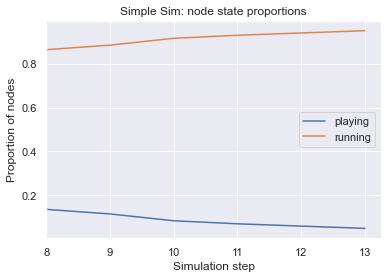

In [27]:
sim.plot(min_step=8, max_step=14)

D:\Programs\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

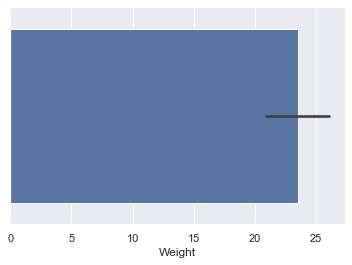

In [28]:
# Numeric Only

sns.barplot(df["Weight"])

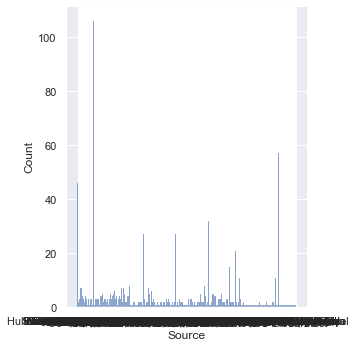

In [29]:
# 0ne column only
sns.displot(df["Source"])

D:\Programs\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


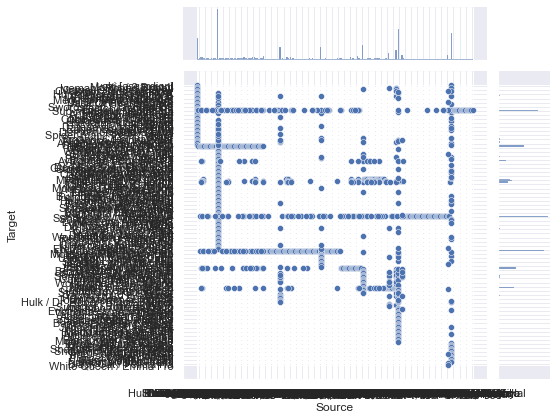

In [30]:
sns.jointplot(df["Source"],df["Target"],df["Weight"])

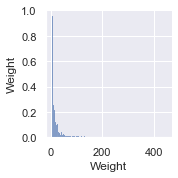

In [31]:
# Numeric only too
sns.pairplot(df[["Source","Target","Weight"]])

D:\Programs\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

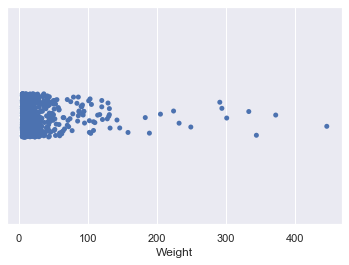

In [32]:
# Numeric Only
sns.stripplot(df["Weight"])

D:\Programs\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

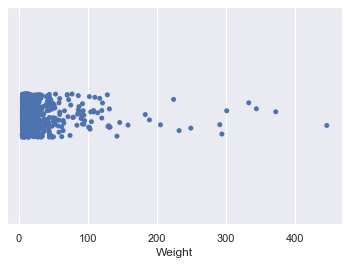

In [33]:
sns.stripplot(df["Weight"],jitter=True)

D:\Programs\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

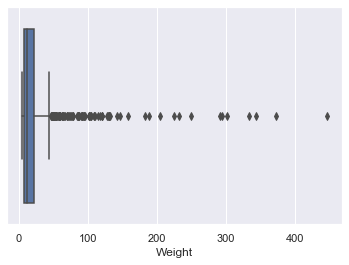

In [34]:
# Numeric Only
sns.boxplot(df["Weight"])

D:\Programs\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='count'>

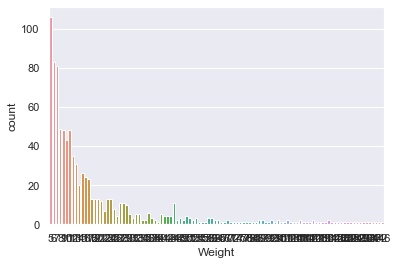

In [35]:
sns.countplot(df["Weight"])

D:\Programs\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Source'>

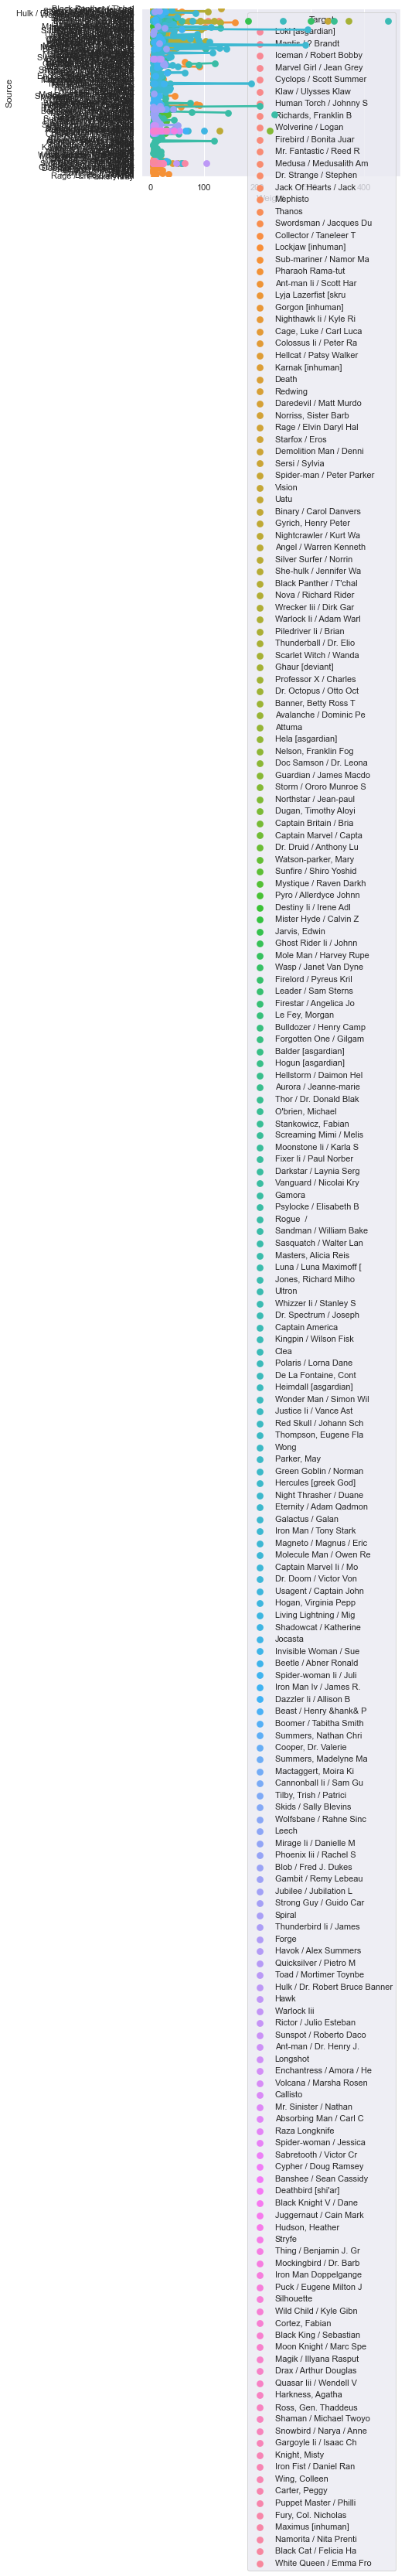

In [36]:
sns.pointplot(df["Weight"],df["Source"],df["Target"])

# Community Detection

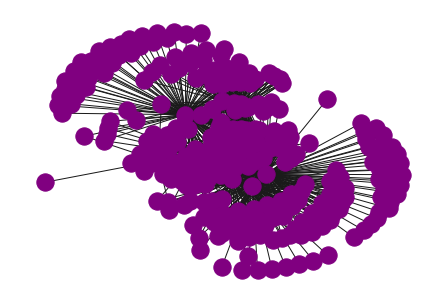

In [54]:
nx.draw(G,node_color="purple")

In [72]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [55]:
my_edge_betweenness = nx.edge_betweenness_centrality(G)
most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
G.remove_edge(*most_valuable_edge)

In [56]:
nx.connected_components(G)

<generator object connected_components at 0x000002490CE7BD60>

In [57]:
partition_sequence = []
for _ in range(G.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(G))
    partition_sequence.append(my_partition)

In [64]:
#Evaluate the modularity of each partition in the sequence
G=nx.from_pandas_edgelist(df, "Source", "Target","Weight")
modularity_sequence = [modularity(G, p) for p in partition_sequence]
modularity_sequence

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -6.172839506380564e-07,
 -1.851851851808623e-06,
 -3.703703703764337e-06,
 -6.172839506126242e-06,
 -9.259259259273294e-06,
 -1.2962962962952857e-05,
 -1.7283950617291248e-05,
 -2.2222222222162135e-05,
 -2.7777777777818183e-05,
 -3.395061728400674e-05,
 -4.074074074072785e-05,
 -4.814814814810775e-05,
 -5.617283950614648e-05,
 -6.481481481484403e-05,
 -7.40740740740741e-05,
 -8.395061728396301e-05,
 -9.44444444443844e-05,
 -0.00010555555555559097,
 -0.00011728395061733002,
 -0.0001296296296296016,
 -0.00014259259259253183,
 -0.0001561728395061209,
 -0.00017037037037036893,
 -0.0001851851851851495,
 -0.00020061728395058887,
 -0.0002166666666666871,
 -0.0002333333333333178,
 -0.00025061728395060735,
 -0.00026851851851855576,
 -0.00028703703703703666,
 -0.00030617283950617634,
 -0.0003259259259259749,
 -0.00034629629629630596,
 -0.00036728395061729586,
 -0.00038888888888894454,
 -0.00041111111111112

Text(0.5, 0, 'Algorithm step')

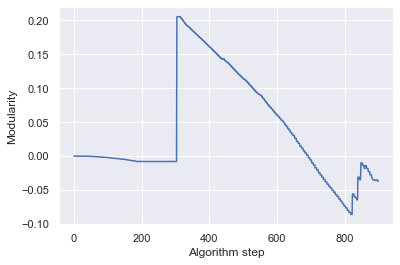

In [65]:
import matplotlib.pyplot as plt
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')

In [67]:
#Get the partition with highest modularity
def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_partition = max(partition_sequence, key=my_modularity)

In [68]:
best_partition

[{'Absorbing Man / Carl C',
  'Ant-man / Dr. Henry J.',
  'Ant-man Ii / Scott Har',
  'Attuma',
  'Aurora / Jeanne-marie',
  'Banner, Betty Ross T',
  'Binary / Carol Danvers',
  'Black Bolt / Blackanto',
  'Black Knight V / Dane',
  "Black Panther / T'chal",
  'Black Widow / Natasha',
  'Bulldozer / Henry Camp',
  'Cage, Luke / Carl Luca',
  'Captain Britain / Bria',
  'Captain Marvel Ii / Mo',
  'Carter, Peggy',
  'Clea',
  'Cloak / Tyrone Johnson',
  'Crystal [inhuman]',
  'Daredevil / Matt Murdo',
  'Darkhawk / Chris Powel',
  'Darkstar / Laynia Serg',
  'Death',
  'Doc Samson / Dr. Leona',
  'Dr. Doom / Victor Von',
  'Dr. Druid / Anthony Lu',
  'Dr. Octopus / Otto Oct',
  'Dr. Strange / Stephen',
  'Drax / Arthur Douglas',
  'Dugan, Timothy Aloyi',
  'Enchantress / Amora / He',
  'Falcon / Sam Wilson',
  'Fandral [asgardian]',
  'Firebird / Bonita Juar',
  'Firelord / Pyreus Kril',
  'Firestar / Angelica Jo',
  'Forgotten One / Gilgam',
  'Fury, Col. Nicholas',
  'Galactus / Gala

In [84]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

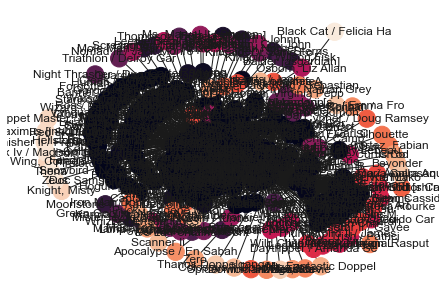

In [95]:
best_partition_map = create_partition_map(best_partition)
#print(len(best_partition_map))
node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

In [94]:
nx.community.quality.modularity(G, best_partition)

0.2053487654320984